# Towards a better understanding of $\Sigma = (I_d - ||\Phi||) C (I_d - ||\Phi||^\top)$

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from mlpp.hawkesnoparam.estim import Estim
import mlpp.pp.hawkes as hk
import whma.simulation as simu
from mlpp.base.utils import TimeFunction
from whma.metrics import rel_err, rank_corr

## $d$ = 2 or $d$ = 3

In [2]:
# simulation of Hawkes processes
d = 2
if d == 2:
    mu = np.array([0.2, 0.3])
    mus = simu.simulate_mu(d, mu=mu)
    Alpha_truth = np.array(
    [[0.7, 0.3],
    [0.5, 0.2]])
    Beta = np.array(
    [[0., 0.],
    [0.5, 0.2]])
elif d == 3:
    mu = np.array([0.2, 0.3, 0.1])
    mus = simu.simulate_mu(d, mu=mu)
    Alpha_truth = np.array(
    [[0.1, 0.2, 0.],
    [0.1, 0.15, 0.5],
    [0.1, 0.2, 0.1]])
    Beta = np.array([
            [0.1, 0.2, 0.1], 
            [0.2, 0.1, 0.3],
            [0., 0.2, 0.1]
        ])

In [3]:
_, s, _ = np.linalg.svd(Alpha_truth)
print(s.max())
assert s.max() < 1, "Alpha_truth cannot generate a stable Hawkes process"

0.932676279467


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


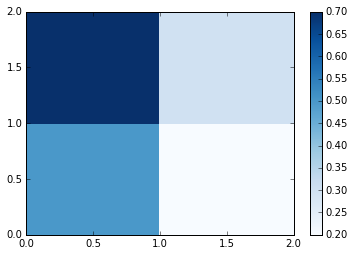

In [4]:
plt.pcolor(Alpha_truth[::-1],cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
plt.close()

In [5]:
kernels = [[hk.HawkesKernelExp(a, b) for (a, b) in zip(a_list, b_list)] for (a_list, b_list) in zip(Alpha_truth, Beta)]
h = hk.Hawkes(kernels=kernels, mus=list(mus))
h.simulate(100)
estim = Estim(h, n_threads=8)

In [7]:
from whma.solver import admm
import whma.prox as prox
X0 = np.eye(d)
#X0 = np.ones(d**2).reshape(d,d)
rho = 0.01
maxiter = 100

In [8]:
# main step
X_ = admm(estim, prox.sq_frob, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

avant :  [ 0.69849457+0.j  0.06522507+0.j]
apres :  [ 0.69849457+0.j  0.06522507+0.j]
||X1 - X_2|| =  4.73753864995e-06
||X2 - X_3|| =  9.20548301574e-17
||U1|| =  0.00145731958428
||U2|| =  0.00148193641334
||U3|| =  1.33111064485e-16
||U4|| =  0.00572859672327
||U5|| =  0.00175318920761


/Users/massil/Programmation/git/whma/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/whma/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/whma/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/whma/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


In [13]:
D = np.array([0.69849457+0.j,0.06522507+0.j])

In [15]:
D.real

array([ 0.69849457,  0.06522507])

In [15]:
print("RelErr = ", rel_err(Alpha_truth, X_))
print("RankCorr = ", rank_corr(Alpha_truth, X_))

RelErr =  1.5756302521
RankCorr =  0.158655260369


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


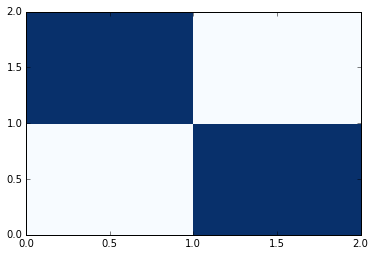

In [16]:
plt.pcolor(X_[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [17]:
X_

array([[ 0.98039216,  0.        ],
       [ 0.        ,  0.98039216]])

In [18]:
Alpha_truth

array([[ 0.7,  0.3],
       [ 0.5,  0.2]])

In [19]:
0.5*(Alpha_truth+Alpha_truth.T)

array([[ 0.7,  0.4],
       [ 0.4,  0.2]])